In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.special as sspecial
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
cd drive/My\ Drive/Colab\ Notebooks/statisticallearning-2020/Sheet10/Solution

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/statisticallearning-2020/Sheet10/Solution'
/Users/ahmetsaltik/Desktop/TU München/2. Dönem/Statistical Learning/Exercise 11


## Exercise 1

a) Naive Bayes assumes univariate Gaussians, whereas GMMs allow for multivariate Gaussians.

b) Let us analyze the waiting time between eruptions and the duration of the eruption for the Old Faithful geyser in Yellowstone National Park using mixture models. 

In [4]:
wait = pd.read_csv('wait.csv')
wait.head(10)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
5,2.883,55
6,4.700,88
7,3.600,85
8,1.950,51
9,4.350,85


Text(0.5, 0, 'Minutes')

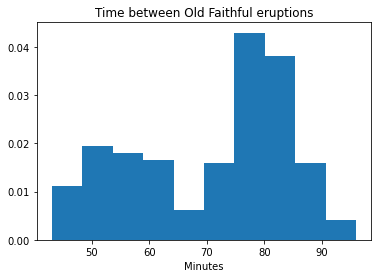

In [5]:
# let's plot a histogram
plt.hist(wait['waiting'],rwidth=10,density=True)
plt.title('Time between Old Faithful eruptions')
plt.xlabel('Minutes')

In [7]:
# Now fit a mixture model with two components
# init weights lambda, means mu, and standard deviations sigma
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=2).fit(np.array(wait['waiting']).reshape(-1, 1))
gmm.predict(np.array(wait['waiting']).reshape(-1, 1))

array([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0])

Text(0.5, 0, 'Minutes')

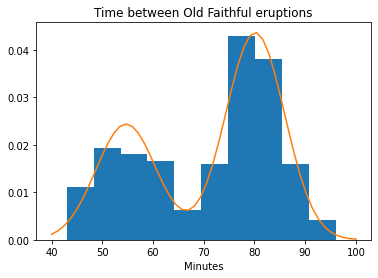

In [10]:
# display predicted scores by the model as a curveplot
x = np.linspace(40, 100.)
z = gmm.score_samples(x.reshape(-1,1))
plt.hist(wait['waiting'],rwidth=10,density=True)
plt.plot(x,np.exp(z))
plt.title('Time between Old Faithful eruptions')
plt.xlabel('Minutes')

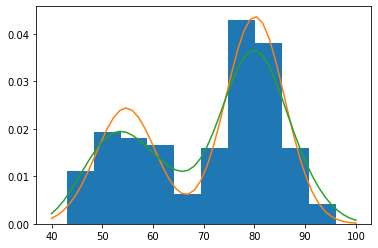

In [12]:
# Compare to the density plot
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='gaussian', bandwidth=4.0).fit(np.array(wait['waiting']).reshape(-1, 1))
log_dens = kde.score_samples(x.reshape(-1,1))
plt.hist(wait['waiting'],rwidth=10,density=True)
plt.plot(x,np.exp(z))
plt.plot(x, np.exp(log_dens), '-')

## Exercise 2

### 2a) Generate synthetic data

In [20]:
X1 = np.random.multivariate_normal(np.array([0,0]), np.array([[1.0,0], [0,1]]), 1000)
X2 = np.random.multivariate_normal(np.array([-2,4]), np.array([[0.3,0], [0,0.3]]), 100)
X3 = np.random.multivariate_normal(np.array([2,4]), np.array([[0.3,0], [0,0.3]]), 100)
X = np.concatenate((X1,X2,X3),axis=0)
print(np.shape(X)) # ben merak edip yazdim

(1200, 2)


Text(0, 0.5, 'y')

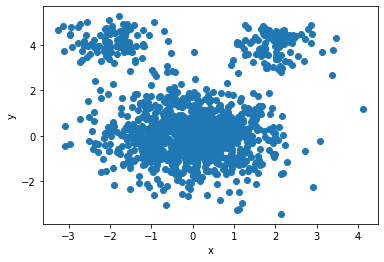

In [21]:
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x')
plt.ylabel('y')

### 2b) Use k means clustering

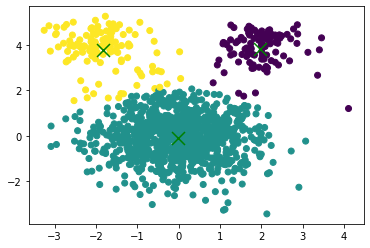

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='g', zorder=10)

### 2c) Use Gaussian Mixture Models to cluster

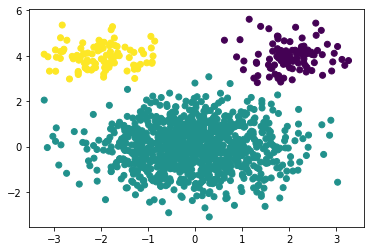

In [62]:
gmm_2d = mixture.GaussianMixture(n_components=3).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=gmm_2d.predict(X))

## Exercise 3

In [23]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
features, target = load_wine(return_X_y=True)
# Make a train/test split using 30% test size
RANDOM_STATE=40
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target,
                                                    test_size=0.30,
                                                    random_state=RANDOM_STATE)

In [24]:
Xtrain_mean = np.mean(Xtrain)
Xtrain_std = np.std(Xtrain)
# Scale training data to have zero mean and unit variance (standard derivation)
Xtrain = (Xtrain-Xtrain_mean)/Xtrain_std

# Scale testing data using training mean and trainig standard derivation
Xtest = (Xtest-Xtrain_mean)/Xtrain_std

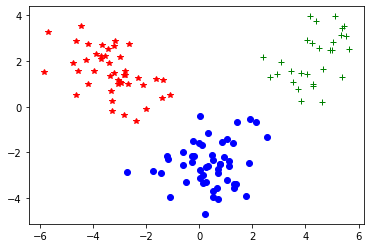

In [25]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
fit_lda = lda.fit(Xtrain, ytrain)
X_lda = fit_lda.transform(Xtrain)
plt.plot(X_lda[ytrain==0,0],X_lda[ytrain==0,1],'r*') # make a scatterplot
plt.plot(X_lda[ytrain==1,0],X_lda[ytrain==1,1],'bo') # make a scatterplot
plt.plot(X_lda[ytrain==2,0],X_lda[ytrain==2,1],'g+') # make a scatterplot

explained variance ratio (first two components): [0.99824245 0.00159645]


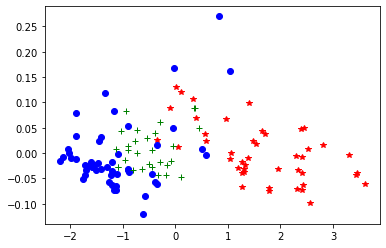

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit(Xtrain).transform(Xtrain)
plt.plot(X_pca[ytrain==0,0],X_pca[ytrain==0,1],'r*') # make a scatterplot
plt.plot(X_pca[ytrain==1,0],X_pca[ytrain==1,1],'bo') # make a scatterplot
plt.plot(X_pca[ytrain==2,0],X_pca[ytrain==2,1],'g+') # make a scatterplot
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

Both PCA and LDA are linear transformation techniques. However, PCA is an unsupervised while LDA is a supervised dimensionality reduction technique. PCA has no concern with the class labels. In simple words, PCA summarizes the feature set without relying on the output. By contrast, LDA finds the best axises to separate classes. 